# Scan analysis

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [4]:
import pandas as pd

from math import floor

import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

from plots2.fns import (
    get_corner_annotations,
    get_dose_colors
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
)

from poly2.utils import (
    get_best_dose_for_cb,
)
from poly2.run import get_data_from_pars
from poly2.config import Config

In [5]:
df = pd.read_csv('../outputs/combined/processed_scan_all.csv')

In [6]:
df.head(2)

,run,year,best_dose,mu,b,asymp,dec_rate,m_prop,m_scale,ME_mean
0,0,1,1.0,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.397237
1,0,2,1.0,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.397237


In [7]:
cf = Config(verbose=False, n_k=300)

default_b = cf.k_b
default_mu = cf.k_mu
a = cf.k_mu * cf.k_b

default_ME_mean = (default_b/(default_b+1))**a

## Plot

### Bar

In [8]:
barchartdf = (
    df
    .loc[:, ['best_dose', 'run', 'year']]
    
    .drop('run', axis=1)
    
    .groupby('year')
    
    .value_counts()
    .reset_index()
    .rename(columns={0: 'count'})
    .pivot(index='year', columns='best_dose', values='count')
)

barchartdf.head(5)

best_dose,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
year,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.0
2,NaN,1.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,9992.0
3,11.0,12.0,10.0,4.0,4.0,5.0,1.0,2.0,3.0,9948.0
4,27.0,32.0,27.0,23.0,30.0,14.0,8.0,8.0,8.0,9823.0
5,53.0,72.0,74.0,56.0,29.0,37.0,21.0,19.0,23.0,9616.0


<AxesSubplot:xlabel='year'>

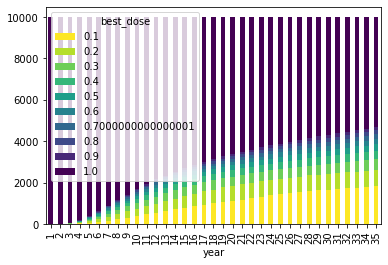

In [9]:
(
    barchartdf
    .plot
    .bar(
        stacked=True,
        colormap='viridis_r',
        legend=True
    )
)

### Line plot

In [10]:
pars = (
    df
    .loc[lambda x: x.run==3]
    .head(1)
    .filter(regex='^((?!in_0).)*$')
    .drop(['best_dose', 'year', 'run'], axis=1)
    .rename(columns = {
        'dec_rate_multiplier': 'dec_rate',
        'm_prop_multiplier': 'm_prop',
        'm_scale_multiplier': 'm_scale',
        'asymptote': 'asymp',
    })
)

pars

,mu,b,asymp,dec_rate,m_prop,m_scale,ME_mean
105,21.750304,3.890784,0.978618,2.464423,0.83745,3.639639,0.021382


In [11]:
pars.round(4)

,mu,b,asymp,dec_rate,m_prop,m_scale,ME_mean
105,21.7503,3.8908,0.9786,2.4644,0.8374,3.6396,0.0214


Below cell takes around `4.5 minutes`

In [12]:
%%time
line_df = get_data_from_pars(pars)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [04:31<00:00, 27.19s/it]

Wall time: 4min 31s


In [29]:
line_df.head()

,dose,yld,year
0,0.1,9.239656,1
1,0.1,9.239644,2
2,0.1,9.239628,3
3,0.1,9.239607,4
4,0.1,9.239579,5


In [31]:
line_df.year.describe()

count    350.000000
mean      18.000000
std       10.113964
min        1.000000
25%        9.000000
50%       18.000000
75%       27.000000
max       35.000000
Name: year, dtype: float64

In [32]:
bd_use = get_best_dose_for_cb(line_df, 10.3, 0.2)

bd_use.head()

,dose,year,yy
0,1.0,0.8,10.3
0,1.0,1.2,10.3
1,1.0,1.8,10.3
1,1.0,2.2,10.3
2,1.0,2.8,10.3


## The plot

Interested in:

- mu
- ME_mean
- asympt
- dec_rate_multiplier
- m_prop_multiplier
- m_scale_multiplier

In [33]:
barchartdf.replace(np.nan, 0).describe().loc[['min', 'max']]

best_dose,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5311.0
max,1818.0,781.0,543.0,401.0,321.0,258.0,227.0,195.0,168.0,10000.0


In [34]:
barchartdf.loc[[35]]

best_dose,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
year,,,,,,,,,,
35,1818.0,780.0,543.0,399.0,320.0,258.0,216.0,187.0,168.0,5311.0


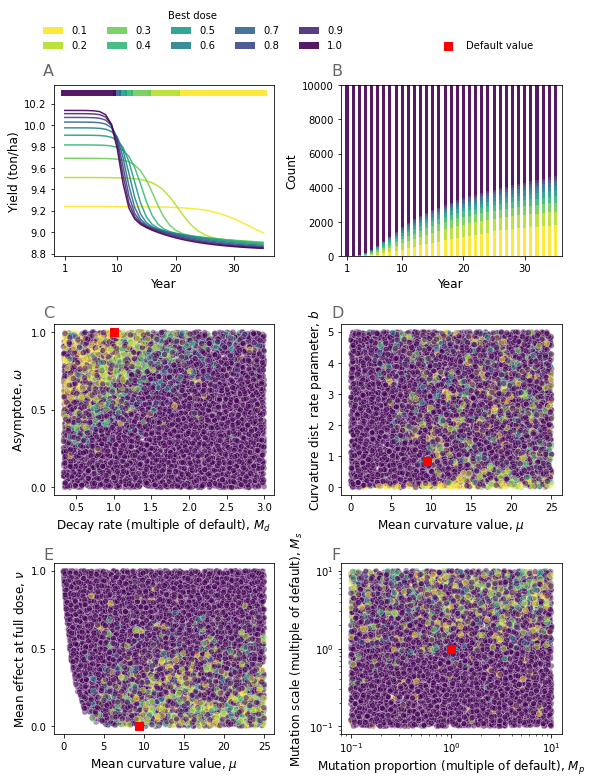

In [35]:
f, ax = plt.subplots(3, 2, figsize=(8, 12))

plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_FONT)  # fontsize of the figure title

# A
alpha_A = 0.9

COLZ = get_dose_colors()

for ind, dose in enumerate(line_df.dose.unique()):
    n_d = len(line_df.dose.unique())
    
    colr = COLZ[ind]
    
    ax[0][0].plot(line_df.loc[lambda x: x.dose==dose].year,
            line_df.loc[lambda x: x.dose==dose].yld,
            alpha=alpha_A,
            c=colr)
    
    ax[0][0].plot(bd_use.loc[lambda x: x.dose==dose].year,
            bd_use.loc[lambda x: x.dose==dose].yy,
            c=colr,
            alpha=alpha_A,
            lw=6)

# B
(
    barchartdf
    .plot
    .bar(
        stacked=True,
        colormap='viridis_r',
        alpha = 0.9,
        ax=ax[0][1],
        legend=True,
    )
)


# TYPE 2

dfu = df.loc[lambda x: x.year.isin([10])]

alpha = 0.5

# C
sns.scatterplot(
    x='dec_rate',
    y='asymp',
    hue='best_dose',
    data=dfu,
    alpha=alpha,
    palette='viridis_r',
    sizes=(20, 80),
    ax=ax[1][0],
    legend=False,
)

# D
sns.scatterplot(
    x='mu',
    y='b',
    hue='best_dose',
    data=dfu,
    alpha=alpha,
    palette='viridis_r',
    sizes=(20, 80),
    ax=ax[1][1],
    legend=False,
)

# E
sns.scatterplot(
    x='mu',
    y='ME_mean',
    hue='best_dose',
    data=dfu,
    alpha=alpha,
    palette='viridis_r',
    sizes=(20, 80),
    ax=ax[2][0],
    legend=False,
)

# F
sns.scatterplot(
    x='m_prop',
    y='m_scale',
    hue='best_dose',
    data=dfu,
    alpha=alpha,
    palette='viridis_r',
    sizes=(20, 80),
    ax=ax[2][1],
    legend=False,
)

cc = 'red'
marker = 's'
ss = 80






# layout


# A
ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('Yield (ton/ha)')
# ax[0][1].set_xticks([0, 9, 19, 29])
ax[0][0].set_xticks([1,10,20,30])
ax[0][0].set_xticklabels([1,10,20,30], rotation=0)


# B
ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Count')

ax[0][1].set_ylim([0,10000])
ax[0][1].set_xlim([-1, 35])
ax[0][1].set_xticks([0, 9, 19, 29])
ax[0][1].set_xticklabels([1,10,20,30], rotation=0)

# C
ax[1][0].set_xlabel(r'Decay rate (multiple of default), $M_d$')
ax[1][0].set_ylabel(r'Asymptote, $\omega$')

ax[1][0].set_yticks([0, 0.5, 1])
ax[1][0].scatter([1], [1], c=cc, s=ss, marker=marker, label='Default value')


# D
ax[1][1].set_xlabel(r'Mean curvature value, $\mu$')
ax[1][1].set_ylabel(r'Curvature dist. rate parameter, $b$')

ax[1][1].scatter([default_mu], [default_b], c=cc, s=ss, marker=marker)



# E
ax[2][0].set_xlabel(r'Mean curvature value, $\mu$')
ax[2][0].set_ylabel(r'Mean effect at full dose, $\nu$')

ax[2][0].scatter([default_mu], [default_ME_mean], c=cc, s=ss, marker=marker)
ax[2][0].set_yticks([0, 0.5, 1])


# F
ax[2][1].set_xlabel(r'Mutation proportion (multiple of default), $M_p$')
ax[2][1].set_ylabel(r'Mutation scale (multiple of default), $M_s$')

ax[2][1].set_xscale('log')
ax[2][1].set_yscale('log')
ax[2][1].scatter([1], [1], c=cc, s=ss, marker=marker)



plt.tight_layout(rect=[0,0,1,0.83], h_pad=3)

ax[0][1].legend(
    bbox_to_anchor=(0.05, 1.15),
    loc='lower right',
    labels=[f'{ii:.1f}' for ii in np.arange(0.1,1.1,0.1)],
    title='Best dose',
    ncol=5,
    framealpha=0,
)

ax[1][0].legend(
    bbox_to_anchor=(1.7, 2.55),
    loc='lower left',
    framealpha=0,
)

get_corner_annotations(2, 3, 0.075, 0.82, 0.5, 0.28, plt)

In [23]:
f.savefig('../figures/paper/fig3.jpg', dpi=1200, bbox_inches="tight")

In [ ]:
bd_use.plot(x='year', y='dose')